## Objective: to build a classifier that can predict whether a person is going to default or not based on their credit history details

### 1. Import required libraries

In [26]:
#Importing necessary packages in Python 
%matplotlib inline 
import matplotlib.pyplot as plt 

import numpy as np ; 
import pandas as pd

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder 
from sklearn.model_selection import train_test_split

import itertools
from sklearn import model_selection
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures, StandardScaler

from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import BaggingClassifier


from sklearn.model_selection import GridSearchCV

from sklearn.preprocessing import PolynomialFeatures, StandardScaler

from sklearn import metrics
from sklearn.metrics import classification_report,confusion_matrix, roc_curve, roc_auc_score, auc, accuracy_score
import seaborn as sns
sns.set_context('notebook') 
sns.set_style(style='darkgrid')


### 2. Read the provided csv file and check shape, info, and statistical summary of the data

In [2]:
credit_data = pd.read_csv("Credit.csv")
print(credit_data.shape)

(1000, 21)


In [3]:
print (credit_data.columns)

Index(['default', 'account_check_status', 'duration_in_month',
       'credit_history', 'purpose', 'credit_amount', 'savings',
       'present_emp_since', 'installment_as_income_perc',
       'personal_status_sex', 'other_debtors', 'present_res_since', 'property',
       'age', 'other_installment_plans', 'housing', 'credits_this_bank', 'job',
       'people_under_maintenance', 'telephone', 'foreign_worker'],
      dtype='object')


In [4]:
credit_data.head()

,default,account_check_status,duration_in_month,credit_history,purpose,credit_amount,savings,present_emp_since,installment_as_income_perc,personal_status_sex,...,present_res_since,property,age,other_installment_plans,housing,credits_this_bank,job,people_under_maintenance,telephone,foreign_worker
0,0,< 0 DM,6,critical account/ other credits existing (not ...,domestic appliances,1169,unknown/ no savings account,.. >= 7 years,4,male : single,...,4,real estate,67,none,own,2,skilled employee / official,1,"yes, registered under the customers name",yes
1,1,0 <= ... < 200 DM,48,existing credits paid back duly till now,domestic appliances,5951,... < 100 DM,1 <= ... < 4 years,2,female : divorced/separated/married,...,2,real estate,22,none,own,1,skilled employee / official,1,none,yes
2,0,no checking account,12,critical account/ other credits existing (not ...,(vacation - does not exist?),2096,... < 100 DM,4 <= ... < 7 years,2,male : single,...,3,real estate,49,none,own,1,unskilled - resident,2,none,yes
3,0,< 0 DM,42,existing credits paid back duly till now,radio/television,7882,... < 100 DM,4 <= ... < 7 years,2,male : single,...,4,if not A121 : building society savings agreeme...,45,none,for free,1,skilled employee / official,2,none,yes
4,1,< 0 DM,24,delay in paying off in the past,car (new),4870,... < 100 DM,1 <= ... < 4 years,3,male : single,...,4,unknown / no property,53,none,for free,2,skilled employee / official,2,none,yes


In [5]:
credit_data.describe()

,default,duration_in_month,credit_amount,installment_as_income_perc,present_res_since,age,credits_this_bank,people_under_maintenance
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.300000,20.903000,3271.258000,2.973000,2.845000,35.546000,1.407000,1.155000
std,0.458487,12.058814,2822.736876,1.118715,1.103718,11.375469,0.577654,0.362086
min,0.000000,4.000000,250.000000,1.000000,1.000000,19.000000,1.000000,1.000000
25%,0.000000,12.000000,1365.500000,2.000000,2.000000,27.000000,1.000000,1.000000
50%,0.000000,18.000000,2319.500000,3.000000,3.000000,33.000000,1.000000,1.000000
75%,1.000000,24.000000,3972.250000,4.000000,4.000000,42.000000,2.000000,1.000000
max,1.000000,72.000000,18424.000000,4.000000,4.000000,75.000000,4.000000,2.000000


## Observations1: No Missing values in the dataset

In [6]:
credit_data.dtypes

default                        int64
account_check_status          object
duration_in_month              int64
credit_history                object
purpose                       object
credit_amount                  int64
savings                       object
present_emp_since             object
installment_as_income_perc     int64
personal_status_sex           object
other_debtors                 object
present_res_since              int64
property                      object
age                            int64
other_installment_plans       object
housing                       object
credits_this_bank              int64
job                           object
people_under_maintenance       int64
telephone                     object
foreign_worker                object
dtype: object

## 3. Select columns having data type as object and save it in a new data frame

In [7]:
credit_data_objects_df =credit_data[['account_check_status', 'credit_history', 'purpose', 'savings', 'present_emp_since','personal_status_sex', 'other_debtors', 'property','other_installment_plans','housing','job', 'telephone', 'foreign_worker']].copy()

In [8]:
credit_data_objects_df.head()

,account_check_status,credit_history,purpose,savings,present_emp_since,personal_status_sex,other_debtors,property,other_installment_plans,housing,job,telephone,foreign_worker
0,< 0 DM,critical account/ other credits existing (not ...,domestic appliances,unknown/ no savings account,.. >= 7 years,male : single,none,real estate,none,own,skilled employee / official,"yes, registered under the customers name",yes
1,0 <= ... < 200 DM,existing credits paid back duly till now,domestic appliances,... < 100 DM,1 <= ... < 4 years,female : divorced/separated/married,none,real estate,none,own,skilled employee / official,none,yes
2,no checking account,critical account/ other credits existing (not ...,(vacation - does not exist?),... < 100 DM,4 <= ... < 7 years,male : single,none,real estate,none,own,unskilled - resident,none,yes
3,< 0 DM,existing credits paid back duly till now,radio/television,... < 100 DM,4 <= ... < 7 years,male : single,guarantor,if not A121 : building society savings agreeme...,none,for free,skilled employee / official,none,yes
4,< 0 DM,delay in paying off in the past,car (new),... < 100 DM,1 <= ... < 4 years,male : single,none,unknown / no property,none,for free,skilled employee / official,none,yes


## 4. Check the shape and info of the above data frame having only object columns

In [9]:
credit_data_objects_df.shape

(1000, 13)

In [10]:
credit_data_objects_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
account_check_status       1000 non-null object
credit_history             1000 non-null object
purpose                    1000 non-null object
savings                    1000 non-null object
present_emp_since          1000 non-null object
personal_status_sex        1000 non-null object
other_debtors              1000 non-null object
property                   1000 non-null object
other_installment_plans    1000 non-null object
housing                    1000 non-null object
job                        1000 non-null object
telephone                  1000 non-null object
foreign_worker             1000 non-null object
dtypes: object(13)
memory usage: 101.6+ KB


## 5. Check for correlation among the predictors in the original dataset.

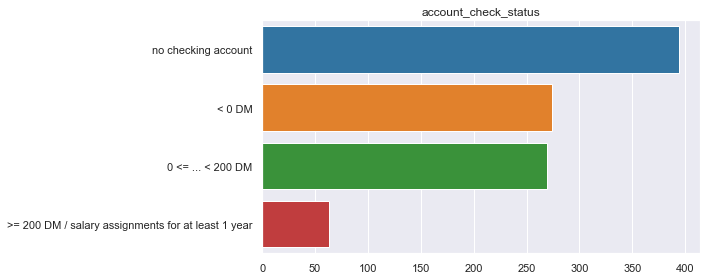

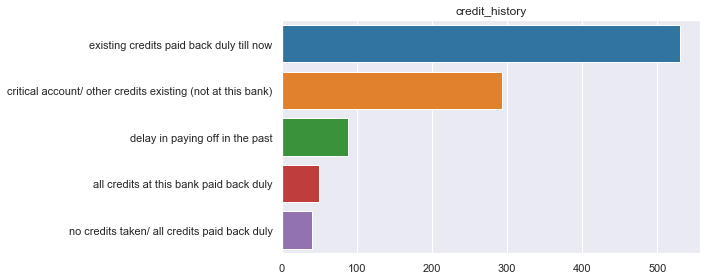

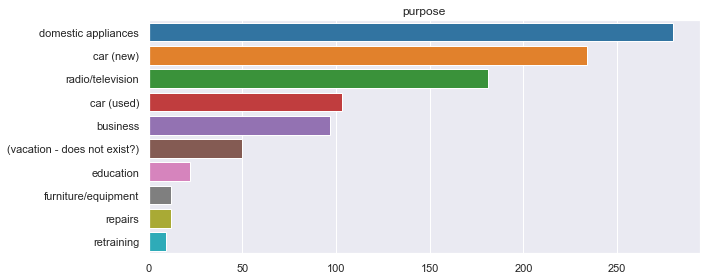

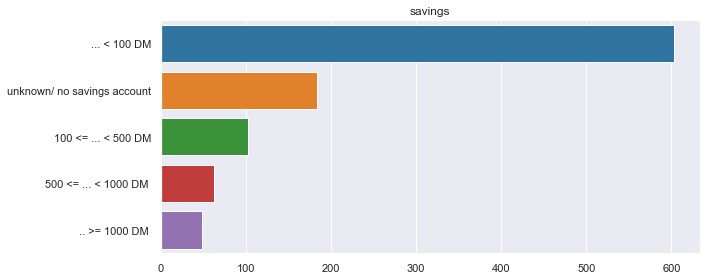

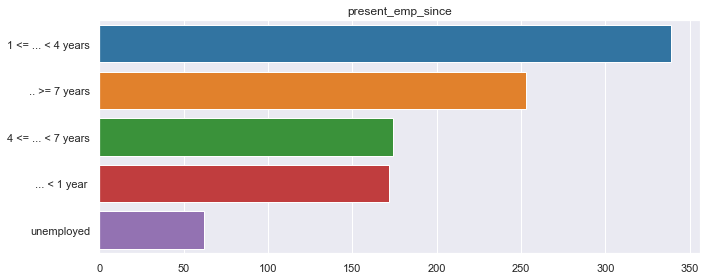

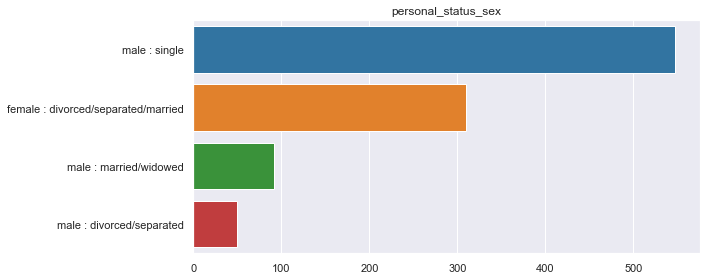

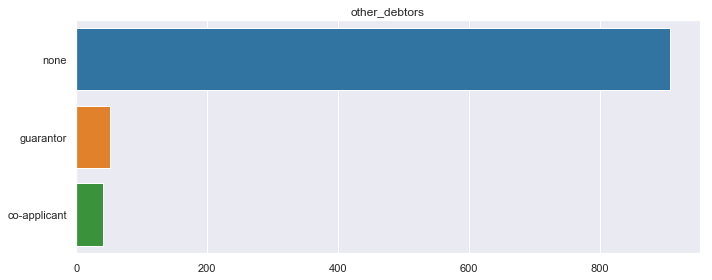

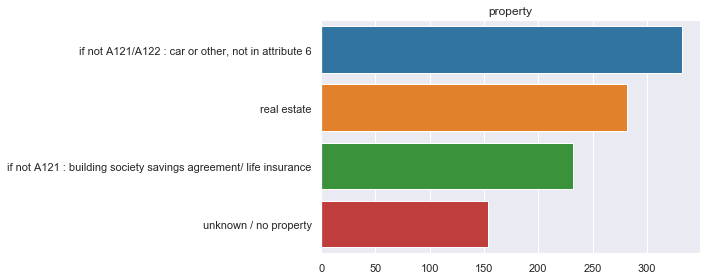

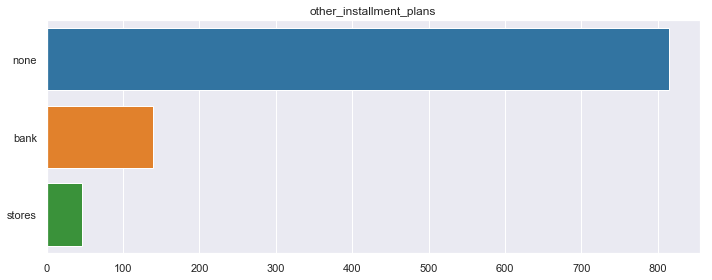

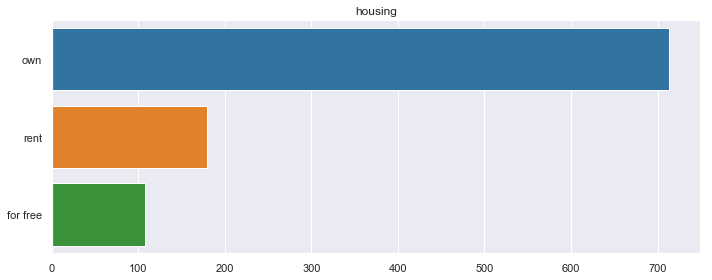

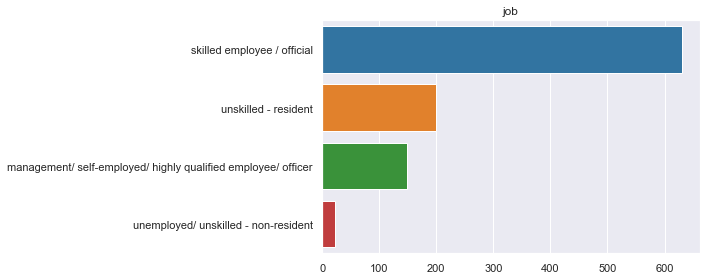

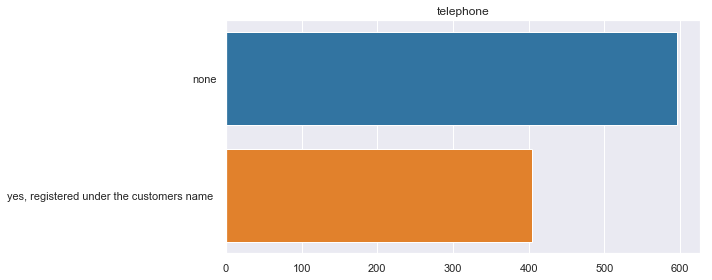

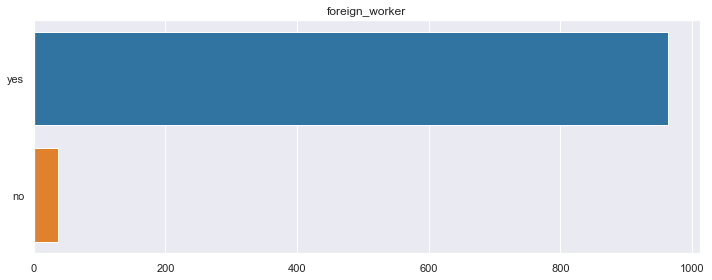

In [11]:
category_elements = ['account_check_status', 'credit_history', 'purpose', 'savings', 'present_emp_since','personal_status_sex', 'other_debtors', 'property','other_installment_plans','housing','job', 'telephone', 'foreign_worker']
for ele in category_elements:
    plt.figure(figsize=(10,4))
    sns.barplot(credit_data_objects_df[ele].value_counts().values, credit_data_objects_df[ele].value_counts().index)
    plt.title(ele)
    plt.tight_layout()

e:\ANACONDA\lib\site-packages\matplotlib\tight_layout.py:199: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  warnings.warn('Tight layout not applied. '
e:\ANACONDA\lib\site-packages\matplotlib\tight_layout.py:199: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  warnings.warn('Tight layout not applied. '


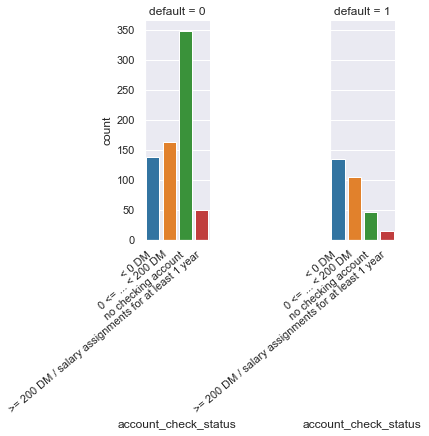

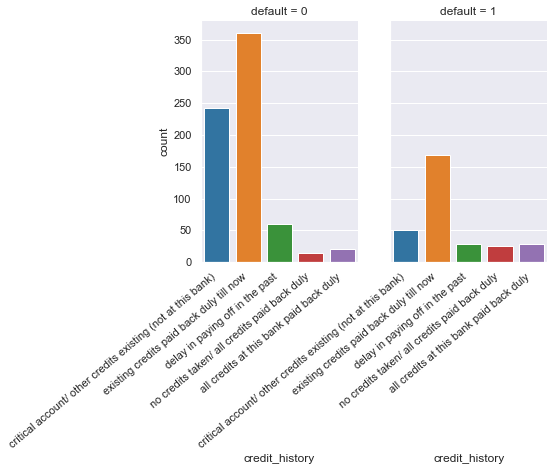

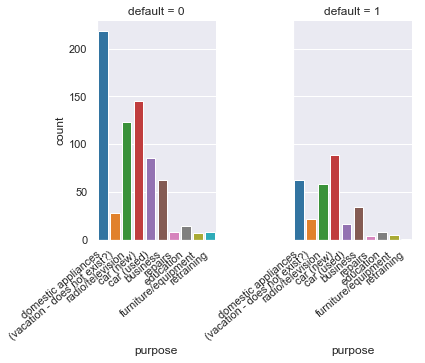

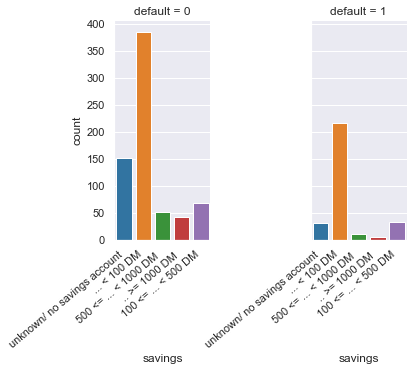

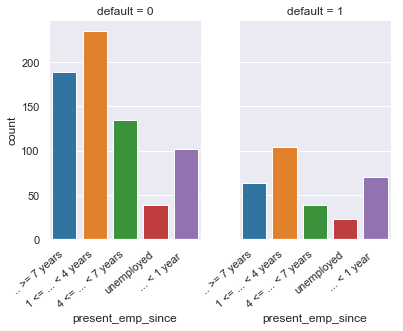

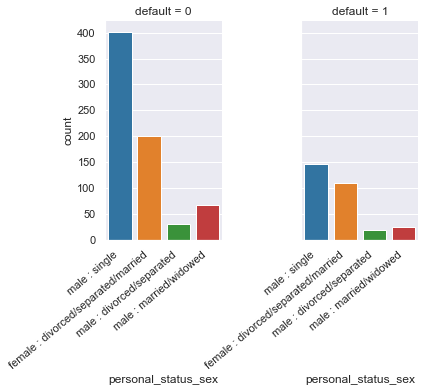

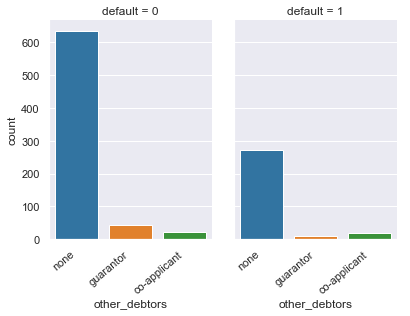

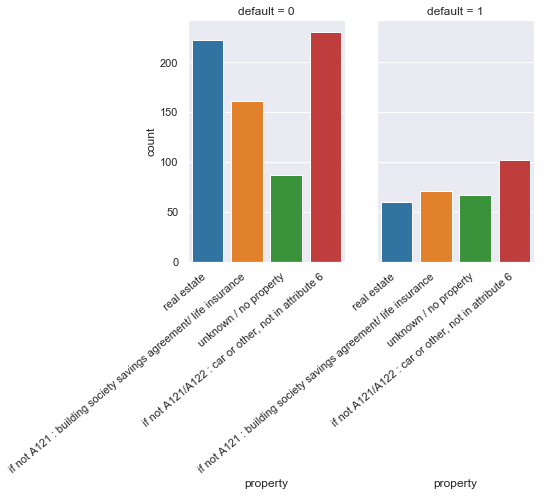

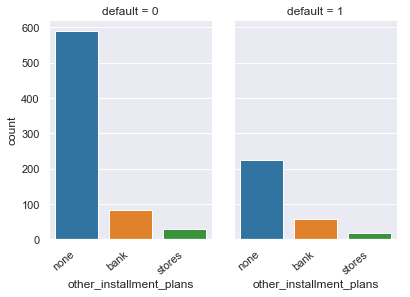

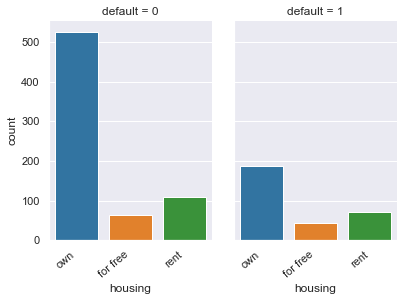

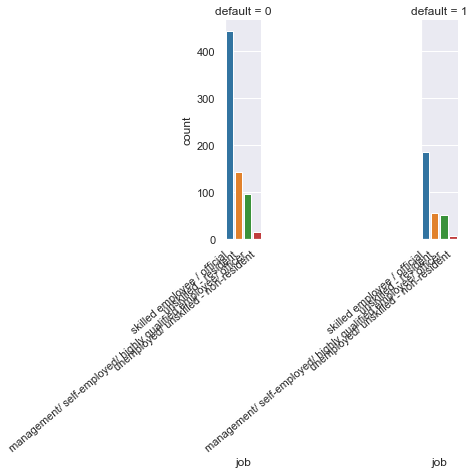

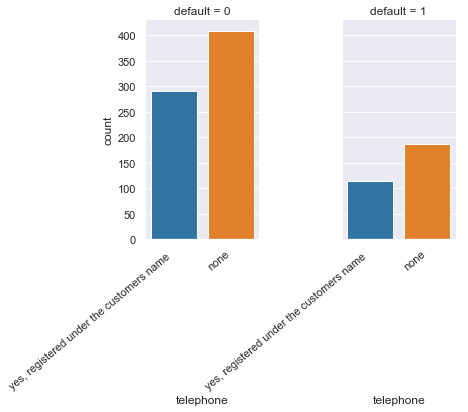

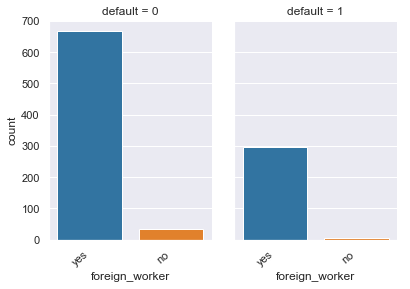

In [12]:
category_elements = ['account_check_status', 'credit_history', 'purpose', 'savings', 'present_emp_since','personal_status_sex', 'other_debtors', 'property','other_installment_plans','housing','job', 'telephone', 'foreign_worker']
for ele in category_elements:
    g = sns.catplot(x=ele,  col="default",
           data=credit_data, kind="count",
                 height=4, aspect=.7);
    g.set_xticklabels(rotation=40, ha="right")

In [89]:
## Observation2: Account Check Status - Less than 0 DM have significantly higher chance of default than other categories
##               Used car buyers
##               Savings <100 DM
##               People with no telephone
## are some parameters of Interest as the pattern to watch out for as common trends of default in loans

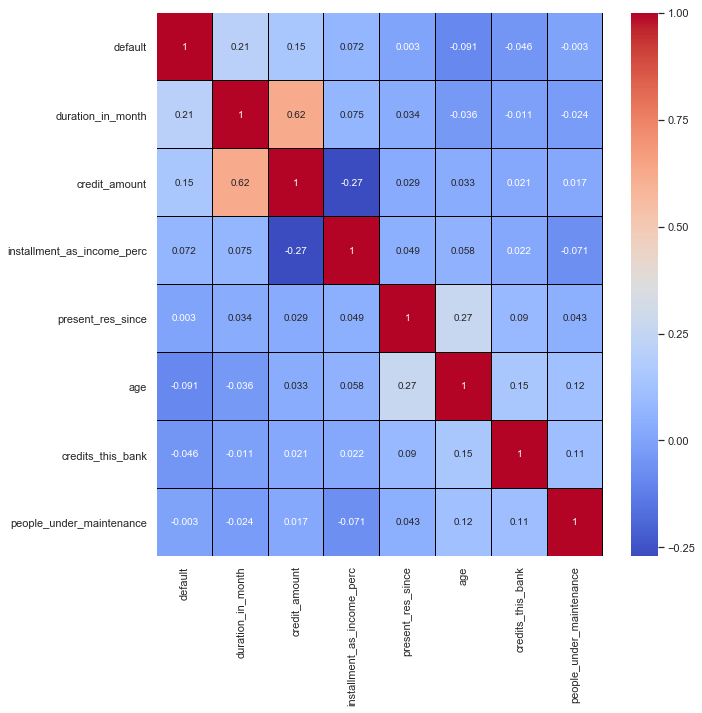

In [13]:
plt.figure(figsize=(10, 10))
sns.heatmap(credit_data.corr(), annot=True, linecolor='black', linewidths=0.05, cmap="coolwarm")

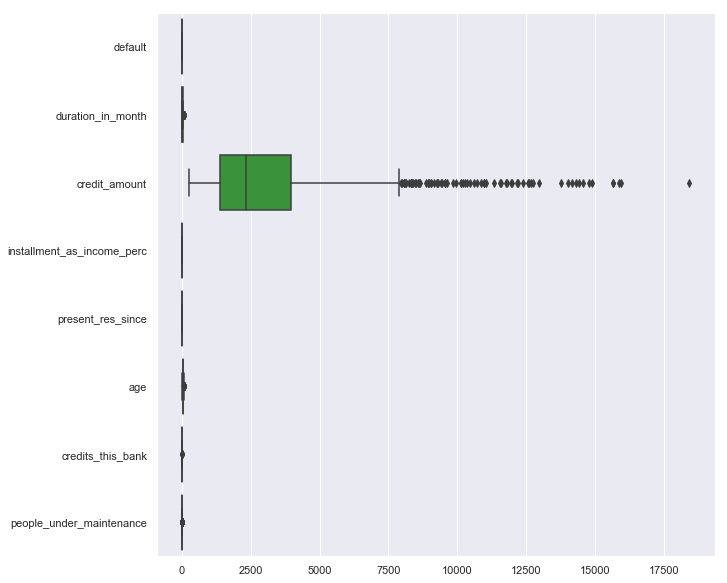

In [60]:
#Lets check to see if the data have outliers
plt.figure(figsize= (10,10))
ax = sns.boxplot(data=credit_data, orient="horizontal")

In [14]:
### Credit Amount Parameter have significant number of outliers. We will use IQR to remove few of the outliers
from scipy.stats import iqr
Qtr1 = credit_data.quantile(0.25)
Qtr3 = credit_data.quantile(0.75)
IQR = Qtr3 - Qtr1
print(IQR)

default                          1.00
duration_in_month               12.00
credit_amount                 2606.75
installment_as_income_perc       2.00
present_res_since                2.00
age                             15.00
credits_this_bank                1.00
people_under_maintenance         0.00
dtype: float64


In [15]:
clean_credit_data = credit_data[~((credit_data < (Qtr1 - 1.5 * IQR)) |(credit_data > (Qtr3 + 1.5 * IQR))).any(axis=1)]

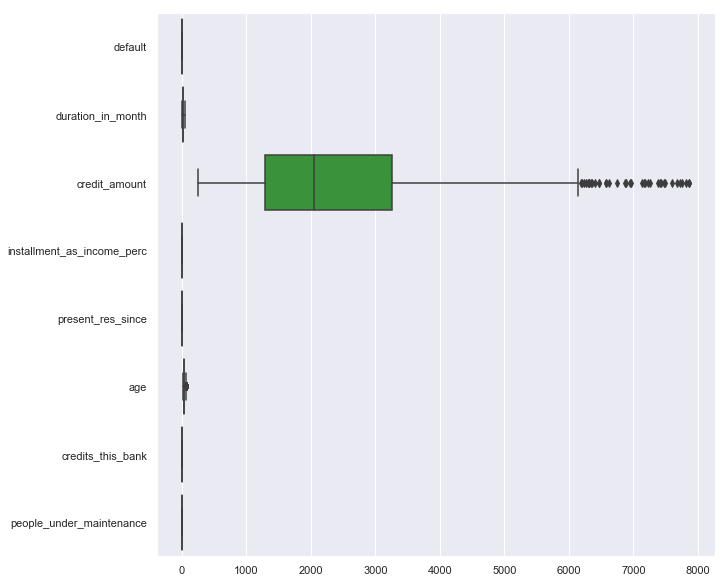

In [16]:
### Data still shows Outliers... but many are removed
plt.figure(figsize= (10,10))
ax = sns.boxplot(data=clean_credit_data, orient="horizontal")

## 6. Drop irrelevant columns 

In [17]:
## Test a few combinations of columns to be removed. Did not find any co-relations, so not removing any column
#clean_df= clean_credit_data.drop('people_under_maintenance', axis=1)
clean_df = clean_credit_data

In [18]:
clean_df['default'].value_counts()

0    538
1    190
Name: default, dtype: int64

## 7. Encode above categorical data using get dummies and drop first. (hint - get dummies (data, drop first=True)

In [19]:

credit_data_with_dummies = pd.get_dummies(clean_df, drop_first=True)

In [20]:
credit_data_with_dummies.head()

,default,duration_in_month,credit_amount,installment_as_income_perc,present_res_since,age,credits_this_bank,people_under_maintenance,account_check_status_< 0 DM,account_check_status_>= 200 DM / salary assignments for at least 1 year,...,property_unknown / no property,other_installment_plans_none,other_installment_plans_stores,housing_own,housing_rent,job_skilled employee / official,job_unemployed/ unskilled - non-resident,job_unskilled - resident,"telephone_yes, registered under the customers name",foreign_worker_yes
6,0,24,2835,3,4,53,1,1,0,0,...,0,1,0,1,0,1,0,0,0,1
7,0,36,6948,2,2,35,1,1,0,0,...,0,1,0,0,1,0,0,0,1,1
8,0,12,3059,2,4,61,1,1,0,0,...,0,1,0,1,0,0,0,1,0,1
9,1,30,5234,4,2,28,2,1,0,0,...,0,1,0,1,0,0,0,0,0,1
10,1,12,1295,3,1,25,1,1,0,0,...,0,1,0,0,1,1,0,0,0,1


In [21]:
credit_data_with_dummies.dtypes

default                                                                       int64
duration_in_month                                                             int64
credit_amount                                                                 int64
installment_as_income_perc                                                    int64
present_res_since                                                             int64
age                                                                           int64
credits_this_bank                                                             int64
people_under_maintenance                                                      int64
account_check_status_< 0 DM                                                   uint8
account_check_status_>= 200 DM / salary assignments for at least 1 year       uint8
account_check_status_no checking account                                      uint8
credit_history_critical account/ other credits existing (not at this bank)  

## 8. Separate target column from the features

In [22]:
X = credit_data_with_dummies.drop(['default'],axis=1)     

Y = credit_data_with_dummies['default'] 

## Use Scaling to make all data standard
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_std =  sc.fit_transform(X)



## 9. Split the data (Use 70:30 split)

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X_std, Y, test_size=0.3, random_state=1)

## 10. Apply Random forest model

In [27]:
randomforest_model = RandomForestClassifier(max_depth=2, random_state=0)
randomforest_model.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=2, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

## 11. Evaluate above model using accuracy and confusion matrix

In [28]:
predicted_random=randomforest_model.predict(X_test)
randomforest_model.score(X_test, y_test)

0.7397260273972602

In [ ]:
## Observation 3: Accuracy is low

Confusion Matrix
   Predict 1  Predict 0
1          0         57
0          0        162


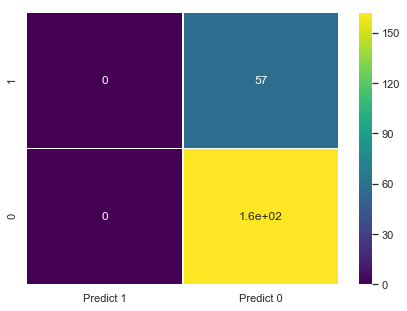

In [29]:
print("Confusion Matrix")
cm=metrics.confusion_matrix(y_test, predicted_random, labels=[1, 0])

df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
print(df_cm)
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True, cmap='viridis', linecolor='white', linewidths=0.5)

## 12. Check feature importance (Hint - RF.feature_importances_)

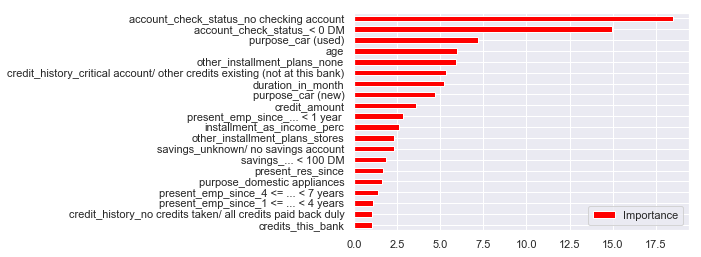

In [30]:
Importance = pd.DataFrame({'Importance':randomforest_model.feature_importances_*100}, index=X.columns)
Importance.sort_values('Importance', axis=0, ascending=True).tail(20).plot(kind='barh', color='r', )

In [100]:
## As guessed above, some parameters like Account check status, Used car are Important features

In [31]:
# Function to get roc curve
def get_roc (y_test,y_pred):
    # Compute ROC curve and ROC area for each class
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    fpr, tpr, _ = roc_curve(y_test, y_pred)
    roc_auc = auc(fpr, tpr)
    #Plot of a ROC curve
    plt.figure()
    lw = 2
    plt.plot(fpr, tpr, color='darkorange',
             label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="upper left")
    plt.show()
    return

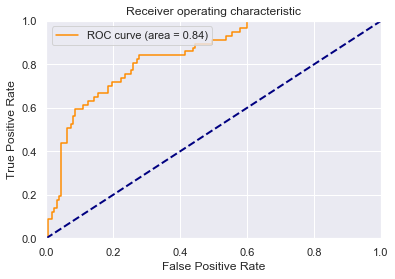

In [32]:
# Predict target variables y for test data
y_pred = randomforest_model.predict_proba(X_test)[:,1]
get_roc (y_test,y_pred)

## Dataset is Unbalanced. Lets Balance it with Smote and then check Accuracy

In [34]:
from imblearn.over_sampling import SMOTE


Using TensorFlow backend.


In [35]:
print("Before UpSampling, counts of label '1': {}".format(sum(y_train==1)))
print("Before UpSampling, counts of label '0': {} \n".format(sum(y_train==0)))
sm = SMOTE(sampling_strategy = 1 ,k_neighbors = 5, random_state=1)   #Synthetic Minority Over Sampling Technique
X_train_res, y_train_res = sm.fit_sample(X_train, y_train.ravel())
print("After UpSampling, counts of label '1': {}".format(sum(y_train_res==1)))
print("After UpSampling, counts of label '0': {} \n".format(sum(y_train_res==0)))

print('After UpSampling, the shape of train_X: {}'.format(X_train_res.shape))
print('After UpSampling, the shape of train_y: {} \n'.format(y_train_res.shape))


Before UpSampling, counts of label '1': 133
Before UpSampling, counts of label '0': 376 

After UpSampling, counts of label '1': 376
After UpSampling, counts of label '0': 376 

After UpSampling, the shape of train_X: (752, 48)
After UpSampling, the shape of train_y: (752,) 



In [36]:
# Fit the model on original data i.e. before upsampling
randomforest_model = RandomForestClassifier(max_depth=2, random_state=0)
randomforest_model.fit(X_train, y_train)
y_predict = randomforest_model.predict(X_test)
model_score = randomforest_model.score(X_test, y_test)
print(model_score)

0.7397260273972602


In [37]:
test_pred = randomforest_model.predict(X_test)

print(metrics.classification_report(y_test, test_pred))
print(metrics.confusion_matrix(y_test, test_pred))

              precision    recall  f1-score   support

           0       0.74      1.00      0.85       162
           1       0.00      0.00      0.00        57

    accuracy                           0.74       219
   macro avg       0.37      0.50      0.43       219
weighted avg       0.55      0.74      0.63       219

[[162   0]
 [ 57   0]]


e:\ANACONDA\lib\site-packages\sklearn\metrics\_classification.py:1268: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
e:\ANACONDA\lib\site-packages\sklearn\metrics\_classification.py:1268: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
e:\ANACONDA\lib\site-packages\sklearn\metrics\_classification.py:1268: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [38]:
# fit model on upsampled data 

randomforest_model.fit(X_train_res, y_train_res)
y_predict = randomforest_model.predict(X_test)
model_score = randomforest_model.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_predict))
print(metrics.classification_report(y_test, y_predict))

0.8036529680365296
[[130  32]
 [ 11  46]]
              precision    recall  f1-score   support

           0       0.92      0.80      0.86       162
           1       0.59      0.81      0.68        57

    accuracy                           0.80       219
   macro avg       0.76      0.80      0.77       219
weighted avg       0.84      0.80      0.81       219



In [ ]:
## Observation 6: Accuracy has improved significantly with SMOTE and also predictions of 1. So significant benefits with SMOTE.
## Precision Recall have all improved

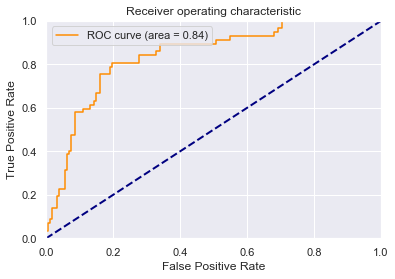

In [39]:
y_pred = randomforest_model.predict_proba(X_test)[:,1]
get_roc (y_test,y_pred)

## 13. Apply Grid Search to tune important hyperparameters like,n_estimators,criterion, max_depth, and min_samples_leaf

In [ ]:
## Applying Gridsearch to tune Hyper parameters

In [85]:
grid_param = {
    'n_estimators': [100, 300, 500, 800, 1000],
    'criterion': ['gini', 'entropy'],
    'bootstrap': [True, False],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
}

In [86]:
def classifiers_hypertune(name,rf,param_grid,x_train,y_train,x_test,y_test,CV):
    CV_rf = GridSearchCV(estimator=rf, param_grid=param_grid, cv=CV, verbose= 1, n_jobs =-1 )
    CV_rf.fit(x_train, y_train)
    
    y_pred_train = CV_rf.predict(x_train)
    y_pred_test = CV_rf.predict(x_test)
    
    print('Best Score: ', CV_rf.best_score_)
    print('Best Params: ', CV_rf.best_params_)
    
    
    
    #Classification Report
    print(name+" Classification Report: ")
    print(classification_report(y_test, y_pred_test))
    
   
    #Confusion Matrix for test data
    print("Confusion Matrix")
    cm=metrics.confusion_matrix(y_test, predicted_random, labels=[1, 0])

    df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
    print(df_cm)
    plt.figure(figsize = (7,5))
    sns.heatmap(df_cm, annot=True, cmap='viridis', linecolor='white', linewidths=0.5)
    print("Random_Forest Score:",round(accuracy_score(y_test, y_pred_test),2)*100)

Fitting 10 folds for each of 1440 candidates, totalling 14400 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    4.5s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   22.7s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:   59.6s
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 1234 tasks      | elapsed:  3.1min
[Parallel(n_jobs=-1)]: Done 1784 tasks      | elapsed:  4.6min
[Parallel(n_jobs=-1)]: Done 2434 tasks      | elapsed:  6.4min
[Parallel(n_jobs=-1)]: Done 3184 tasks      | elapsed:  8.4min
[Parallel(n_jobs=-1)]: Done 4034 tasks      | elapsed: 10.6min
[Parallel(n_jobs=-1)]: Done 4984 tasks      | elapsed: 13.2min
[Parallel(n_jobs=-1)]: Done 6034 tasks      | elapsed: 16.2min
[Parallel(n_jobs=-1)]: Done 7184 tasks      | elapsed: 19.3min
[Parallel(n_jobs=-1)]: Done 8434 tasks      | elapsed: 22.5min
[Parallel(n_jobs=-1)]: Done 9784 tasks      | elapsed: 26.0min
[Parallel(n_jobs=-1)]: Done 11234 tasks      |

Best Score:  0.850140350877193
Best Params:  {'bootstrap': False, 'criterion': 'gini', 'max_depth': 80, 'max_features': 2, 'min_samples_leaf': 3, 'min_samples_split': 10, 'n_estimators': 800}
Random Forest Classifier Classification Report: 
              precision    recall  f1-score   support

           0       0.82      0.93      0.87       162
           1       0.68      0.40      0.51        57

    accuracy                           0.79       219
   macro avg       0.75      0.67      0.69       219
weighted avg       0.78      0.79      0.78       219

Confusion Matrix
   Predict 1  Predict 0
1          0         57
0          0        162
Random_Forest Score: 79.0


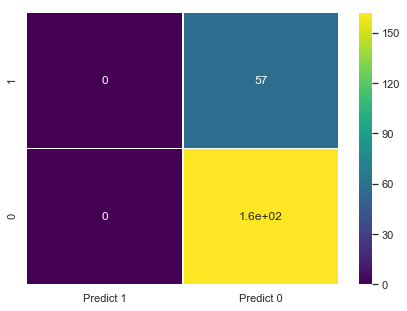

In [87]:
classifiers_hypertune("Random Forest Classifier", randomforest_model, grid_param,X_train_res, y_train_res, X_test, y_test,10)

In [108]:
## Best Parameters are listed above. So higher gains from using SMOTE. Lets try other classifiers and see performance

In [40]:
import pandas
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures, StandardScaler

from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import train_test_split, KFold



In [64]:
credit_data_with_dummies.head()

,default,duration_in_month,credit_amount,installment_as_income_perc,present_res_since,age,credits_this_bank,people_under_maintenance,account_check_status_< 0 DM,account_check_status_>= 200 DM / salary assignments for at least 1 year,...,property_unknown / no property,other_installment_plans_none,other_installment_plans_stores,housing_own,housing_rent,job_skilled employee / official,job_unemployed/ unskilled - non-resident,job_unskilled - resident,"telephone_yes, registered under the customers name",foreign_worker_yes
6,0,24,2835,3,4,53,1,1,0,0,...,0,1,0,1,0,1,0,0,0,1
7,0,36,6948,2,2,35,1,1,0,0,...,0,1,0,0,1,0,0,0,1,1
8,0,12,3059,2,4,61,1,1,0,0,...,0,1,0,1,0,0,0,1,0,1
9,1,30,5234,4,2,28,2,1,0,0,...,0,1,0,1,0,0,0,0,0,1
10,1,12,1295,3,1,25,1,1,0,0,...,0,1,0,0,1,1,0,0,0,1


In [136]:
X = credit_data_with_dummies.drop(['default'],axis=1)     

y = credit_data_with_dummies['default'] 

## Use Scaling to make all data standard
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)


In [142]:
# Prepare cross-validation (cv)
cv = KFold(n_splits = 5, random_state = None)
# prepare configuration for cross validation test harness
seed = 7


e:\ANACONDA\lib\site-packages\sklearn\model_selection\_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
e:\ANACONDA\lib\site-packages\sklearn\model_selection\_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


LR: 0.706123 (0.075478)
RF: 0.837895 (0.098342)


e:\ANACONDA\lib\site-packages\sklearn\model_selection\_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


ADA: 0.792702 (0.111667)


e:\ANACONDA\lib\site-packages\sklearn\model_selection\_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


GB: 0.776772 (0.102733)


e:\ANACONDA\lib\site-packages\sklearn\model_selection\_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


BAG: 0.776632 (0.087237)
LDA: 0.710088 (0.078875)
KNN: 0.706404 (0.187286)

e:\ANACONDA\lib\site-packages\sklearn\model_selection\_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
e:\ANACONDA\lib\site-packages\sklearn\model_selection\_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning



CART: 0.784719 (0.127105)
NB: 0.562982 (0.275856)


e:\ANACONDA\lib\site-packages\sklearn\model_selection\_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
e:\ANACONDA\lib\site-packages\sklearn\model_selection\_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
e:\ANACONDA\lib\site-packages\sklearn\model_selection\_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


SVM: 0.883123 (0.081188)


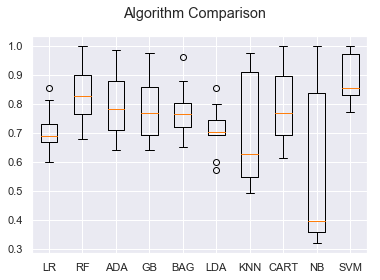

In [143]:
models = []
models.append(('LR', LogisticRegression()))
models.append(('RF', RandomForestClassifier(bootstrap= False, criterion= 'gini', max_depth= 80, max_features= 2, min_samples_leaf= 3, n_estimators= 800)))
models.append(('ADA',BaggingClassifier(n_estimators=10, max_samples= .7, bootstrap=True)))
models.append(('GB',GradientBoostingClassifier(n_estimators = 50, learning_rate = 0.05)))
models.append(('BAG',AdaBoostClassifier( n_estimators= 20)))             
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(C=1000)))
# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state=seed)
    cv_results = model_selection.cross_val_score(model, X_train_res, y_train_res, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

## As can be seen, Random Forest, SVM perform well with Balanced Dataset with accuracy over >80%